## 3. Simple Linear Regression

Simple Linear Regression models the relationship between a single independent
variable and a dependent variable by fitting a straight line.


In [21]:
X_simple = df_encoded[['median_income']]
y = df_encoded['median_house_value']


In [22]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)


In [23]:
slr = LinearRegression()
slr.fit(X_train_s, y_train_s)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred_s = slr.predict(X_test_s)


In [25]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test_s, y_pred_s))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_s, y_pred_s)))
print("R2 Score:", r2_score(y_test_s, y_pred_s))


Mean Squared Error (MSE): 7091157771.76555
Root Mean Squared Error (RMSE): 84209.01241414454
R2 Score: 0.45885918903846656


In [26]:
print("Slope (Coefficient):", slr.coef_[0])
print("Intercept:", slr.intercept_)


Slope (Coefficient): 41933.849393812685
Intercept: 44459.7291690789


The slope represents the change in house value for a unit increase in median income,
while the intercept represents the base value when median income is zero.


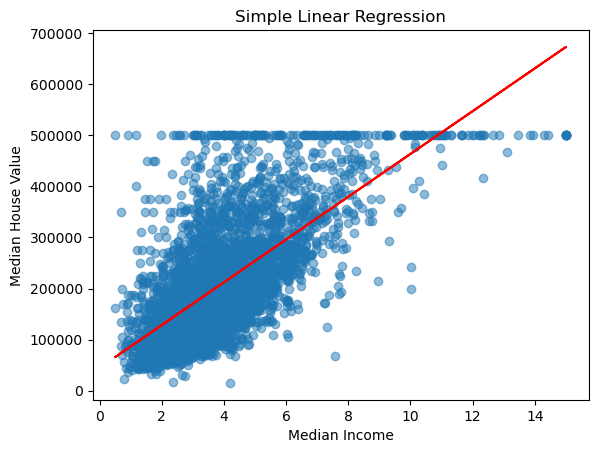

In [27]:
plt.scatter(X_test_s, y_test_s, alpha=0.5)
plt.plot(X_test_s, y_pred_s, color='red')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression")
plt.show()


## 4. Multiple Linear Regression

Multiple Linear Regression models the relationship between two or more independent
variables and a dependent variable.


In [28]:
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']


In [29]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
mlr = LinearRegression()
mlr.fit(X_train_m, y_train_m)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred_m = mlr.predict(X_test_m)


In [32]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test_m, y_pred_m))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_m, y_pred_m)))
print("R2 Score:", r2_score(y_test_m, y_pred_m))


Mean Squared Error (MSE): 4904399775.949249
Root Mean Squared Error (RMSE): 70031.41991955646
R2 Score: 0.6257351821159725


In [33]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": mlr.coef_
})

coefficients.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
9,ocean_proximity_ISLAND,136125.072615
7,median_income,39473.975175
11,ocean_proximity_NEAR OCEAN,3431.140073
2,housing_median_age,1102.185084
4,total_bedrooms,102.789395
6,households,48.252753
3,total_rooms,-6.021506
5,population,-38.172906
10,ocean_proximity_NEAR BAY,-5136.642217
1,latitude,-25468.352050


The coefficients represent the impact of each feature on the house value while
keeping other features constant. Positive coefficients indicate a direct
relationship, whereas negative coefficients indicate an inverse relationship.


### Comparison: Simple vs Multiple Linear Regression

Multiple Linear Regression performs better than Simple Linear Regression as it
considers multiple influencing factors instead of a single feature, leading to
improved predictive performance.


## 5. Polynomial Regression

Polynomial Regression is used when the relationship between the independent
variable and the dependent variable is non-linear. It extends linear regression
by adding polynomial features.


In [35]:
X_poly_input = df_encoded[['median_income']]
y = df_encoded['median_house_value']


In [36]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly_input, y, test_size=0.2, random_state=42
)


In [37]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_p)
X_test_poly = poly.transform(X_test_p)


In [38]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_p)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
y_pred_poly = poly_model.predict(X_test_poly)


In [40]:
print("Polynomial Regression MSE:", mean_squared_error(y_test_p, y_pred_poly))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_poly)))
print("Polynomial Regression R2:", r2_score(y_test_p, y_pred_poly))


Polynomial Regression MSE: 7032732680.932145
Polynomial Regression RMSE: 83861.38969115731
Polynomial Regression R2: 0.46331772769346224


### Linear vs Polynomial Regression

Polynomial Regression can capture non-linear patterns in the data, whereas
Simple Linear Regression assumes a straight-line relationship. However, higher
degree polynomials may lead to overfitting.


D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


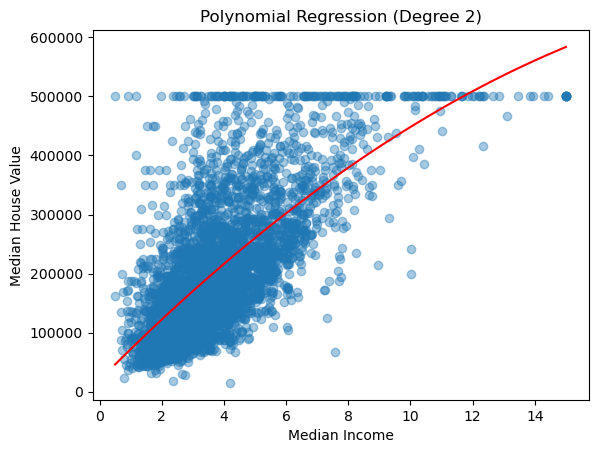

In [41]:
X_sorted = np.sort(X_test_p.values, axis=0)
X_sorted_poly = poly.transform(X_sorted)
y_sorted_pred = poly_model.predict(X_sorted_poly)

plt.scatter(X_test_p, y_test_p, alpha=0.4)
plt.plot(X_sorted, y_sorted_pred, color='red')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Polynomial Regression (Degree 2)")
plt.show()


Ridge regression reduces the magnitude of coefficients but does not eliminate
features completely. Lasso regression performs feature selection by shrinking
some coefficients to zero.


Exploratory Data Analysis helped in understanding the dataset structure,
feature distributions, and relationships between variables. Proper data
preprocessing, including handling missing values and encoding categorical
features, ensured the dataset was suitable for machine learning models.

Simple Linear Regression demonstrated the basic relationship between median
income and house value, while Multiple Linear Regression improved prediction
accuracy by incorporating multiple features. Polynomial Regression was used
to capture non-linear relationships, although it showed potential overfitting
at higher complexity levels.

Regularization techniques such as Ridge and Lasso regression helped in
controlling model complexity and identifying important features. Model
diagnostics confirmed that the assumptions of linear regression were reasonably
satisfied.

Overall, Multiple Linear Regression provided the best performance for this
dataset, balancing accuracy and interpretability.
